## Insight Website Conversion Rate Analysis

We have been provided a dataset summarizing the users demographic information, the number of page each user explored on the Insight website, and whether not they made a purchase on the website (_i.e._ "converted"). The goal of this analysis is to use a model to determine and evaluate parameters that can increase conversion rate.

Conversion rate in this case is defined as number of conversion divided by number of users.


We will begin by first importing exploratory data analysis modules (`panads` and `seaborn`).

In [3]:
import pandas as pd
import seaborn as sns


# Here we set the seaborn visualization style
sns.set()

Here is a quick glance of the data:

In [5]:
df_conversion = pd.read_csv("./conversion_data.csv")

df_conversion

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [8]:
df_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


`pandas` reported that there is no missing data entry, and there there are 316,200 individual users here.

The only modification we will make to the dataset is to transform the 1s and 0s in the "new_user" column to `True` and `False`, which will be temporarily helpful for figure plotting purpose.

In [209]:
# Converting '1' and '0' to True and False.

df_conversion['new_user'] = df_conversion['new_user'].apply(bool)

### Exploratory Data Analysis

First we would like to take a quick look at the demographic breakdown of the users in the dataset. There are four categories we can examine:

- Country of origin
- Whether or not they are a new user
- Where they found out about the website
- Age

Pie charges aren't terribly quantitative, but they serve as a good quick-glance of demographic breakdown for each category with the exception of age. For age, we will use an area graph to observe the rough distribution of ages.

Text(0.5, 0.98, 'Demographic Information')

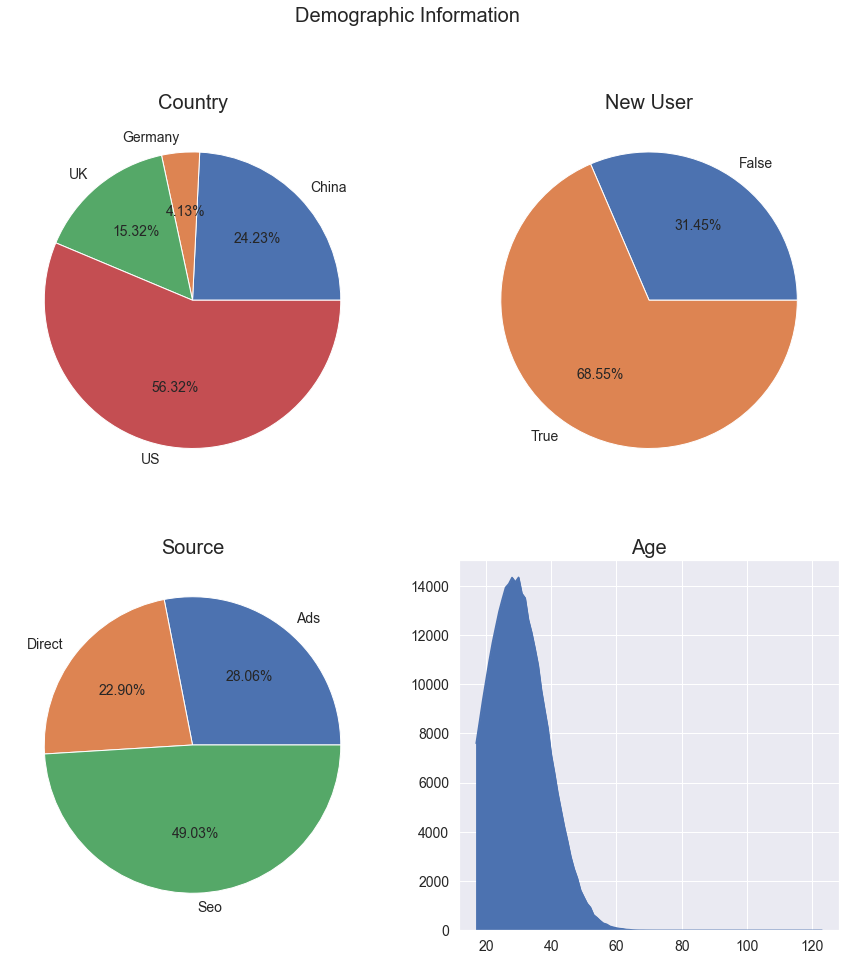

In [151]:
# It isn't actually necessay to import matplotlib here but I have chosen to use it for subplots instead of calling that option within pandas.
import matplotlib.pyplot as plt


demographic_labels = ['country', 'new_user']
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (15, 15))

for key, label in enumerate(demographic_labels):
    tmp = df_conversion.groupby(label).count()['converted']
    tmp.plot.pie(
        ax=ax[0][key],
        title=' '.join(label.title().split('_')),
        fontsize=14,
        ylabel='',
        autopct=lambda x: f'{x:.2f}%',
    )
    
    
df_conversion.groupby('source').count()['converted'].plot.pie(ax=ax[1][0], title='Source', ylabel='', autopct=lambda x: f'{x:.2f}%', fontsize=14)
df_conversion.groupby('age').count()['converted'].plot.area(ax=ax[1][1], title='Age', ylabel='', xlabel='', fontsize=14)

for axis in ax:
    axis[0].title.set_size(20)
    axis[1].title.set_size(20)

fig.suptitle('Demographic Information', fontsize=20)

Several quick observations here:

- More than half of the visitors of the websites were from the US.
- Only about 1/3 of the reported users were returning users.
- ALmost half of the users discovered the website through a search engine of some sort
- User age peak at around 30; there is an abrupt drop off to nothing at around age 16 or so, and also a huge dropoff towards 50 years old, and tapering off upward.

The age distribution warrant a deeper look. We can fit a kernal density estimate plot through the age distribution. This is akin to a histogram but with no "bins".

(0.0, 150.0)

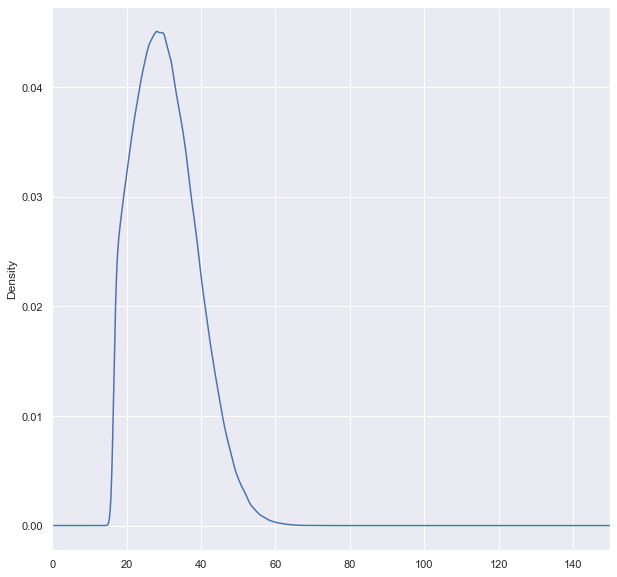

In [186]:
age_kde_hist = plt.figure(figsize=(10, 10))

age_kde_hist.add_subplot(df_conversion['age'].plot.kde())

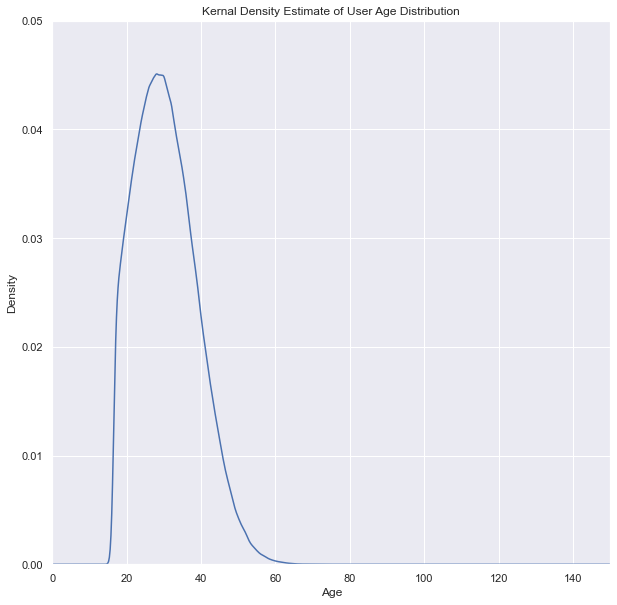

In [211]:
age_kde_hist.gca().set_ylim([0, 0.05])
age_kde_hist.gca().set_xlabel('Age')
age_kde_hist.gca().set_title('Kernal Density Estimate of User Age Distribution')

age_kde_hist

In [206]:
print(df_conversion['age'].describe()); print(f'Kurtosis: {df_conversion["age"].kurt()}'); print(f'Skewness: {df_conversion["age"].skew()}')

count    316200.000000
mean         30.569858
std           8.271802
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max         123.000000
Name: age, dtype: float64
Kurtosis: -0.032362857321238
Skewness: 0.5193216964461843


The following is the summary statistics of the age distribution of the users:

| Statistic          | Value   |
| ------------------ | ------- |
| Number of users    | 316,200 |
| Mean               | 30.57   |
| Standard Deviation | 8.27    |
| Minimum            | 17      |
| 25% Quantile       | 24      |
| Median             | 30      |
| 75% Quantile       | 36      |
| Maximum            | 123     |
| Kurtosis           | -0.0324 |
| Skewness           | 0.519   |

Signature: pd.Series.plot.hist(self, by=None, bins=10, **kwargs)
Docstring:
Draw one histogram of the DataFrame's columns.

A histogram is a representation of the distribution of data.
This function groups the values of all given Series in the DataFrame
into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
This is useful when the DataFrame's Series are in a similar scale.

Parameters
----------
by : str or sequence, optional
    Column in the DataFrame to group by.
bins : int, default 10
    Number of histogram bins to be used.
**kwargs
    Additional keyword arguments are documented in
    :meth:`DataFrame.plot`.

Returns
-------
class:`matplotlib.AxesSubplot`
    Return a histogram plot.

See Also
--------
DataFrame.hist : Draw histograms per DataFrame's Series.
Series.hist : Draw a histogram with Series' data.

Examples
--------
When we draw a dice 6000 times, we expect to get each value around 1000
times. But when we draw two dices and sum the result, the distribution
